# SVM Non Lineari


In questa esercitazione introdurremo l'utilizzo delle SVM nonlineari (per la classificazione) di scikit-learn.

## Riassunto delle SVM Nonlineari (o Kernel SVM)

Per informazioni più approfondite, consultare il capitolo 12 (sezione 4) del libro *Mathematics for Machine Learning* (https://mml-book.github.io/).

### Idea alla Base delle Kernel SVM

Quando si ha a che fare con dati i cui bordi di separazione tra le classi sono _altamente non lineari_, le SVM inevitabilmente falliscono (indipendentemente dal parametro $C$).

>**IDEA:** "Spostiamo" il problema in uno spazio di dimensione superiore (denominato a volte _Spazio delle Features_) dove la separazione tra classi diventa lineare (o quasi).

**IN PRATICA:** Dato il training set $\mathcal{T} = \{ (\boldsymbol{x}_1,y_1),\ldots , (\boldsymbol{x}_T,y_T)\}\in\mathbb{R}^n\times \{\pm 1\}$, scegliamo una mappa (tipicamente _non lineare_) arbitraria
$$\phi :\mathbb{R}^n\rightarrow \mathbb{R}^m\,, \quad \text{con }m>n\,,$$
e risolviamo il problema con una SVM rispetto al _nuovo training set_ 
$$\mathcal{T}^\phi = \{ \left(\boldsymbol{\varphi}_1,y_1\right),\ldots , \left(\boldsymbol{\varphi}_T),y_T\right)\}\in\mathbb{R}^m\times \{\pm 1\}\,, \quad \text{con }\boldsymbol{\varphi}_i = \phi(\boldsymbol{x}_i),\, \forall \ i=1,\ldots ,T\,, $$
"sperando" che ora le classi siano diventate _linearmente separabili_.

### I Problemi del Passaggio allo Spazio delle Features

**Problema 1:** Aumentare la dimensione, comporta necessariamente un _aggravio dei costi computazionali_! 

**Esempio - Problema 1:** Prendiamo le soluzioni $\boldsymbol{w}^*\in\mathbb{R}^m$ e $b\in\mathbb{R}$ del problema di ottimizzazione per le SVM _lineari_ risolto rispetto $\mathcal{T}^\phi$. Avremo allora:
$$\boldsymbol{w}^* = \sum_{i\in\mathcal{I}_{\mathrm{sv}}} y_i\alpha_i^* \boldsymbol{\varphi}_i$$
e
$$b^* = \frac{1}{|\mathcal{I}_{\mathrm{sv}}|} \sum_{i\in\mathcal{I}_{\mathrm{sv}}} (y_i - \langle\boldsymbol{w}^*, \boldsymbol{\varphi}_i\rangle)\,;$$

Per calcolare la predizione $\widehat{y}$ di un generico $\boldsymbol{x}$ del test set (dove $\boldsymbol{\varphi}:=\phi(\boldsymbol{x})$), dovremo quindi calcolare:

\begin{equation}
\begin{aligned}
\widehat{y} &= \mathrm{sign}\left( \langle \boldsymbol{w}^* , \phi(\boldsymbol{x})\rangle + b^*\right) = \\
& = \mathrm{sign}\left(
\sum_{i\in\mathcal{I}_{\mathrm{sv}}} y_i\alpha_i^* \langle \boldsymbol{\varphi}_i , \boldsymbol{\varphi}\rangle + 
\frac{1}{|\mathcal{I}_{\mathrm{sv}}|} \sum_{i\in\mathcal{I}_{\mathrm{sv}}} \left(y_i - 
\sum_{j\in\mathcal{I}_{\mathrm{sv}}} y_j\alpha_j^* \langle\boldsymbol{\varphi}_j ,
\boldsymbol{\varphi}_i\rangle \right)
\right)\,.
\end{aligned}
\end{equation}

Nella formula sopra, il grosso dei calcoli è richiesto per i _prodotti scalari_ $\langle \boldsymbol{\varphi}_i , \boldsymbol{\varphi}\rangle$ e $\langle\boldsymbol{\varphi}_j ,\boldsymbol{\varphi}_i\rangle$, che vanno svolti in $\mathbb{R}^m$, dove presumibilmente $m\gg n$ (teoricamente anche $m=\infty$). Oltretutto, questo problema non è ristretto alle predizioni per il test set, ma si estende anche ai metodi di risoluzione dei problemi di ottimizzazione delle SVM.

**Problema 2:** Quale mappa $\phi :\mathbb{R}^n\rightarrow\mathbb{R}^m$ devo scegliere per una buona separazione _lineare_ in $\mathbb{R}^m$ e dei calcoli "leggeri"?

### Il "Kernel Trick"

La soluzione ai problemi sopra elencati è il cosiddetto "_kernel trick_".

Sia $\mathcal{X}\subseteq\mathbb{R}^n$ il dominio dei vettori $\boldsymbol{x}$ del mio problema di classificazione.

In poche parole, un _Kernel_ $k$ è una funzione 

$$k:\mathcal{X}\times \mathcal{X}\rightarrow\mathbb{R}$$

per cui esiste un'unica mappa 

$$\phi:\mathcal{X}\rightarrow\mathcal{H}\subseteq\mathbb{R}^m\,,$$

con $m>n$ ed $\mathcal{H}$ spazio di _Hilbert_, per cui il prodotto scalare in $\mathcal{H}$ di $\boldsymbol{\varphi}_i=\phi(\boldsymbol{x}_i)$ e $\boldsymbol{\varphi}_j=\phi(\boldsymbol{x}_j)$, per ogni $\boldsymbol{x}_i,\boldsymbol{x}_j\in\mathcal{X}$, è definito da $k$; in altre parole:

$$\langle\boldsymbol{\varphi}_i,\boldsymbol{\varphi}_j\rangle_{\mathcal{H}} = k(\boldsymbol{x}_i,\boldsymbol{x}_j)$$

**Nota bene:** I vantaggi principali garantiti da un kernel $k$ definito come sopra sono i seguenti.
1. **Calcoli svolti in** $\mathbb{R}^n$**:** Il costo computazionale dei prodotti scalari $\langle \cdot ,\cdot\rangle_{\mathcal{H}}$ con vettori di $\mathbb{R}^m$ si possono calcolare in $\mathbb{R}^n$! Possiamo quindi scegliere un qualsiasi valore di $m>n$ senza appesantire i conti.
2. **Non è necessario conoscere** $\phi$ **esplicitamente:** La funzione $\phi$ viene sempre coinvolta tramite il prodotto scalare in $\mathcal{H}$, quindi non è necessario conoscere $\phi$ se si conosce $k$. _NELLA PRATICA:_ si sceglie e si usa il _kernel_ $k$ ma non $\phi$.

**Osservazione:** Per le Kernel SVM si risolve generalmente il problema duale poiché i prodotti scalari $\langle \boldsymbol{w}, \boldsymbol{w}\rangle_{\mathcal{H}}$ e $\langle \boldsymbol{w}, \boldsymbol{x}\rangle_{\mathcal{H}}$ non possono essere calcolati facilmente tramite $k$, perché si dovrebbe disporre di $\boldsymbol{x}_{\boldsymbol{w}}=\phi^{-1}(\boldsymbol{w})$ (ammesso che esista).

### I Kernel più Utilizzati

Di seguito elenchiamo alcuni dei kernel più utilizzati per le SVM ed anche implementati in scikit-learn (vedi https://scikit-learn.org/stable/modules/svm.html#svm-kernels).

1. **Kernel Lineare:** è il kernel corrispondente al caso in cui $\phi$ sia l'identità (cioè è il kernel delle SVM lineari). Specificatamente:
\begin{equation}
\langle\boldsymbol{\varphi}_i, \boldsymbol{\varphi}_j\rangle_{\mathcal{H}} = \langle \boldsymbol{x}_i, \boldsymbol{x}_j\rangle_{\mathcal{X}}\,,
\end{equation}
dove (generalmente, ma non necessariamente) si ha che il prodotto scalare in $\mathcal{X}$ è lo stesso di $\mathbb{R}^n$ che induce la norma euclidea $||\cdot||_2$, cioè $\langle \boldsymbol{x}_i, \boldsymbol{x}_j\rangle_{\mathcal{X}} = \boldsymbol{x}_i^\top \boldsymbol{x}_j$.

2. **Kernel Polinomiale:** è un kernel caratterizzato da un'espressione di tipo polinomiale.
\begin{equation}
\langle \boldsymbol{\varphi}_i, \boldsymbol{\varphi}_j\rangle_{\mathcal{H}} = \left(\gamma \, \langle \boldsymbol{x}_i, \boldsymbol{x}_j\rangle_{\mathcal{X}} + c_0 \right)^d\,;
\end{equation}

3. **Radial Basis Function (RBF) Kernel:** è un kernel caratterizzato da un'espressione di tipo esponenziale (tipicamente il più utilizzato).
\begin{equation}
\langle \boldsymbol{\varphi}_i, \boldsymbol{\varphi}_j\rangle_{\mathcal{H}} = e^{-\gamma \, \langle \boldsymbol{x}_i, \boldsymbol{x}_j\rangle_{\mathcal{X}}^2}\,;
\end{equation}

4. **Kernel "Sigmoidale":** è un kernel caratterizzato da un'espressione di tipo sigmoidale (facente uso della tangente iperbolica).
\begin{equation}
\langle \boldsymbol{\varphi}_i, \boldsymbol{\varphi}_j\rangle_{\mathcal{H}} = \mathrm{tanh}\left(\gamma \, \langle \boldsymbol{x}_i, \boldsymbol{x}_j\rangle_{\mathcal{X}} + c_0 \right)\,;
\end{equation}

#### I Parametri dei Kernel

I parametri $\gamma$ e $c_0$ dei kernel influenzano l'addestramento delle SVM. 

In particolare, più grande è $\gamma$, maggiore è l'influenza che hanno i singoli elementi del training set per l'addestramento. Il valore di $\gamma$, su basi sperimentali, è generalmente impostato di default su valori pari a $1/n$ oppure $1/\left(n \cdot \mathrm{Var}[(x_1^{(1)},\ldots ,x_T^{(1)}, \ldots ,x_1^{(n)}, \ldots , x_T^{(n)})]\right)$.

Il parametro $c_0$, generalmente impostato su $0$, svolge un ruolo simile a gamma ma meno "influente".

# Esercitazione: Implementazione di SVM Non Lineari

Nell'esercitazione di oggi utilizzeremo la classe *SVC* di scikit-learn, pensata per l'implementazione di Kernel SVM con *margine morbido*.

**N.B.:** in scikit-learn non è prevista una classe per SVM senza margine morbido. Per simulare l'assenza di margine morbido è sempre possibile scegliere valori di $C$ molto alti.

**FILE DA SCARICARE:** per le seguenti celle di codice è necessario avere scaricato dalla pagina del corso il dataset _nonlinear_1.csv_. Questo dataset è costituito da $500$ punti in $[-1, 2]^2\subset\mathbb{R}^2$ suddivisi in due classi tali che:
\begin{equation}
\text{class}(\boldsymbol{x}) = 
\begin{cases}
1\,,\quad &\text{se } \ x_1^2 + \frac{1}{2} \leq x_2 \ \vee \ ||\boldsymbol{x} - [0, -\frac{1}{4}]^\top|| \leq \frac{1}{4}\\
0\,,\quad &\text{altrimenti}
\end{cases}\,.
\end{equation}

In [1]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
#%matplotlib widget
#
#
import numpy as np
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

## Importazione e Visualizzazione del Dataset

**Esercizio:** Importare il dataset come un pandas DataFrame e visualizzare i punti tramite uno scatterplot.

In [2]:
# Importazione e visualizzazione del DataFrame come tabella tramite funzione display

dataset = pd.read_csv('data/nonlinear_1.csv')

display(dataset)

,x1,x2,class
0,1.302575,0.661118,0
1,0.115377,1.071897,1
2,0.070935,-0.339227,1
3,1.040557,-0.700399,0
4,-0.850840,0.867135,0
...,...,...,...
495,1.960565,1.525409,0
496,-0.010775,-0.134782,1
497,0.721830,1.760836,1
498,0.852431,0.030409,0


Text(0.5, 1.0, 'Dataset "nonlinear_1"')

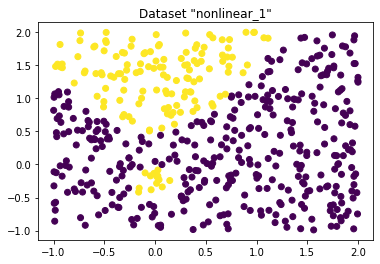

In [3]:
# Scatterplot dei punti del dataset

plt.figure()
plt.scatter(dataset['x1'].values, dataset['x2'].values, c=dataset['class'].values)
plt.title('Dataset "nonlinear_1"')

### Utilizzo della Classe SVC

**Esercizio:** Leggere la documentazione della classe *SVC* (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) e completare i codici delle celle seguenti.
Per i plot, consultare la seguente documentazione:
- https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
- https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html

**Suggerimenti/Indicazioni l'esercizio:**
1. per lo svolgimento dell'esercizio focalizzarsi sui parametri di inizializzazione *C, kernel, degree, gamma, coef0, random_state*;
3. leggere bene i metodi della classe;

**RICORDA:** dati $\boldsymbol{w}^*$ e $b^*$ parametri dell'iperpiano separatore ottimale $\Pi^\phi_{\boldsymbol{w}^*,b^*}$ in $\mathcal{H}\subseteq\mathbb{R}^m$, il margine è identificato da

\begin{equation}
\Pi_{\boldsymbol{w}^*,b^*} = \{\boldsymbol{x}\in\mathbb{R}^n \ | \ \langle\boldsymbol{w}^* , \phi(\boldsymbol{x})\rangle_{\mathcal{H}} + b^* = 0\}\,,
\end{equation}

mentre i bordi del margine sono identificati dai due iperpiani

\begin{equation}
\mathcal{M}^+_{\boldsymbol{w}^*,b^*} = \{\boldsymbol{x}\in\mathbb{R}^n \ | \ \langle\boldsymbol{w}^* , \phi(\boldsymbol{x})\rangle_{\mathcal{H}} + b^* - 1 = 0\}
\end{equation}
e
\begin{equation}
\mathcal{M}^-_{\boldsymbol{w}^*,b^*} = \{\boldsymbol{x}\in\mathbb{R}^n \ | \ \langle\boldsymbol{w}^* , \phi(\boldsymbol{x})\rangle_{\mathcal{H}} + b^* + 1 = 0\}\,;
\end{equation}

cioè sono identificati rispettivamente da quegli $\boldsymbol{x}\in\mathbb{R}^n$ tali che $\langle\boldsymbol{w}^* , \phi(\boldsymbol{x})\rangle_{\mathcal{H}} + b^* =\pm 1$.

**N.B.:** Quanto ricordato sopra può essere utile se si volesse disegnare il bordo ed i margini quando $n=2$. Si può infatti sfruttare le "funzioni di contorno" di matplotlib ed il metodo "_decision_function_" della SVM.

In [4]:
# Suddivisione dataset in training e test set (50% training, 50% test)

random_state = 20210513  # Random seed
test_p = 0.50  # Percentuale di dati da utilizzare come test set

X = dataset.loc[:, ['x1', 'x2']].values
y = dataset['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_p, random_state=random_state, shuffle=True)

,acc. (C1),acc. (C2)
training,0.948,0.988
test,0.980,1.000


Text(0.5, 1.0, 'SVM RBF - C = 100.0')

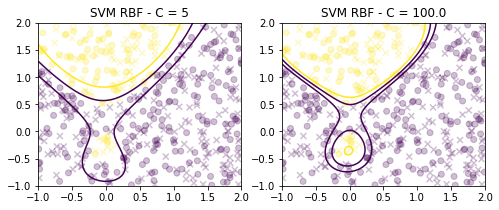

In [5]:
# KERNEL RBF:
# Addestrare due SVM con RBF kernel, rispetto a due valori di C (ma stesso gamma pari ad 1/n)

ker_rbf = 'rbf'
gamma_rbf = 'auto'

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_rbf_1 = SVC(C=C1, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)
svm_rbf_2 = SVC(C=C2, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_state)

# Addestramento SVM
svm_rbf_1.fit(X_train, y_train)
svm_rbf_2.fit(X_train, y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_rbf = pd.DataFrame({'acc. (C1)': [svm_rbf_1.score(X_train, y_train), svm_rbf_1.score(X_test, y_test)],
                           'acc. (C2)': [svm_rbf_2.score(X_train, y_train), svm_rbf_2.score(X_test, y_test)]},
                          index=['training', 'test'])
display(df_svm_rbf)


# Plot
# ISTRUZIONI:
# - raffigurare training e test set con 'marker' diversi dello scatterplot
# - usare la funzione contour (dopo aver definito una mesh di valori con np.meshgrid) per disegnare bordo e margini

minx = -1
maxx = 2
mesh_points = 200

xx1, xx2 = np.meshgrid(np.linspace(minx, maxx, mesh_points), np.linspace(minx, maxx, mesh_points))
XX = np.concatenate([xx1.reshape(mesh_points ** 2, 1), xx2.reshape(mesh_points ** 2, 1)], axis=1)

ZZ_1 = svm_rbf_1.decision_function(XX)
zz_1 = ZZ_1.reshape(mesh_points, mesh_points)

ZZ_2 = svm_rbf_2.decision_function(XX)
zz_2 = ZZ_2.reshape(mesh_points, mesh_points)

fig_rbf, axs_rbf = plt.subplots(1, 2, figsize=(8, 3))
axs_rbf[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', alpha=0.25)
axs_rbf[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', alpha=0.25)
axs_rbf[0].contour(xx1, xx2, zz_1, [0])
axs_rbf[0].contour(xx1, xx2, zz_1, [-1, 1])
axs_rbf[0].set_title('SVM RBF - C = {}'.format(C1))
axs_rbf[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', alpha=0.25)
axs_rbf[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', alpha=0.25)
axs_rbf[1].contour(xx1, xx2, zz_2, [0])
axs_rbf[1].contour(xx1, xx2, zz_2, [-1, 1])
axs_rbf[1].set_title('SVM RBF - C = {}'.format(C2))


,acc. (C1),acc. (C2)
training,0.912,0.920
test,0.920,0.912


Text(0.5, 1.0, 'SVM Polynomial - C = 100000.0')

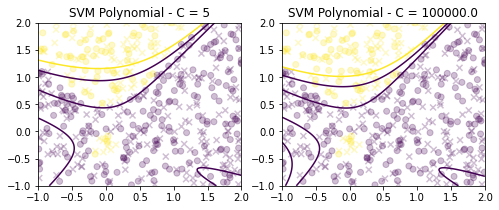

In [6]:
# KERNEL POLINOMIALE:
# Addestrare due SVM con RBF kernel, rispetto a due valori di C (ma stesso gamma pari ad 1/n, stesso grado pari a 3 e stesso c_0 = 0)

ker_poly = 'poly'
gamma_poly = 'auto'
degree = 3
coef0 = 0

C1 = 5
C2 = 1e5

# Inizializzazione SVM
svm_poly_1 = SVC(C=C1, kernel=ker_poly, gamma=gamma_poly, degree=degree, coef0=coef0, random_state=random_state)
svm_poly_2 = SVC(C=C2, kernel=ker_poly, gamma=gamma_poly, degree=degree, coef0=coef0, random_state=random_state)

# Addestramento SVM
svm_poly_1.fit(X_train, y_train)
svm_poly_2.fit(X_train, y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_poly = pd.DataFrame({'acc. (C1)': [svm_poly_1.score(X_train, y_train), svm_poly_1.score(X_test, y_test)],
                            'acc. (C2)': [svm_poly_2.score(X_train, y_train), svm_poly_2.score(X_test, y_test)]},
                           index=['training', 'test'])
display(df_svm_poly)


# Plot
ZZ_1 = svm_poly_1.decision_function(XX)
zz_1 = ZZ_1.reshape(mesh_points, mesh_points)

ZZ_2 = svm_poly_2.decision_function(XX)
zz_2 = ZZ_2.reshape(mesh_points, mesh_points)

fig_poly, axs_poly = plt.subplots(1, 2, figsize=(8, 3))
axs_poly[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', alpha=0.25)
axs_poly[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', alpha=0.25)
axs_poly[0].contour(xx1, xx2, zz_1, [0])
axs_poly[0].contour(xx1, xx2, zz_1, [-1, 1])
axs_poly[0].set_title('SVM Polynomial - C = {}'.format(C1))
axs_poly[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', alpha=0.25)
axs_poly[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', alpha=0.25)
axs_poly[1].contour(xx1, xx2, zz_2, [0])
axs_poly[1].contour(xx1, xx2, zz_2, [-1, 1])
axs_poly[1].set_title('SVM Polynomial - C = {}'.format(C2))

,acc. (C1),acc. (C2)
training,0.580,0.568
test,0.552,0.552


Text(0.5, 1.0, 'SVM Sigmoidal - C = 100.0')

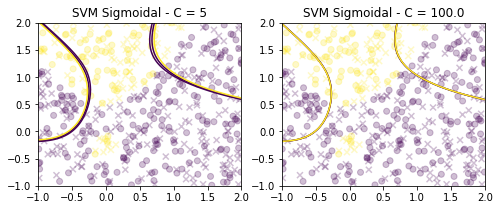

In [7]:
# KERNEL SIGMOIDALE:
# Addestrare due SVM con RBF kernel, rispetto a due valori di C (ma stesso gamma pari ad 1/n e stesso c_0 = 0)

ker_tanh = 'sigmoid'
gamma_tanh = 'auto'
coef0 = 0

C1 = 5
C2 = 1e2

# Inizializzazione SVM
svm_tanh_1 = SVC(C=C1, kernel=ker_tanh, gamma=gamma_tanh, coef0=coef0, random_state=random_state)
svm_tanh_2 = SVC(C=C2, kernel=ker_tanh, gamma=gamma_tanh, coef0=coef0, random_state=random_state)

# Addestramento SVM
svm_tanh_1.fit(X_train, y_train)
svm_tanh_2.fit(X_train, y_train)

# Dataframe con accuratezza su training e test set (visualizzare con funzione 'display')
df_svm_tanh = pd.DataFrame({'acc. (C1)': [svm_tanh_1.score(X_train, y_train), svm_tanh_1.score(X_test, y_test)],
                            'acc. (C2)': [svm_tanh_2.score(X_train, y_train), svm_tanh_2.score(X_test, y_test)]},
                           index=['training', 'test'])
display(df_svm_tanh)


# Plot
ZZ_1 = svm_tanh_1.decision_function(XX)
zz_1 = ZZ_1.reshape(mesh_points, mesh_points)

ZZ_2 = svm_tanh_2.decision_function(XX)
zz_2 = ZZ_2.reshape(mesh_points, mesh_points)

fig_tanh, axs_tanh = plt.subplots(1, 2, figsize=(8, 3))
axs_tanh[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', alpha=0.25)
axs_tanh[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', alpha=0.25)
axs_tanh[0].contour(xx1, xx2, zz_1, [0])
axs_tanh[0].contour(xx1, xx2, zz_1, [-1, 1])
axs_tanh[0].set_title('SVM Sigmoidal - C = {}'.format(C1))
axs_tanh[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x', alpha=0.25)
axs_tanh[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', alpha=0.25)
axs_tanh[1].contour(xx1, xx2, zz_2, [0])
axs_tanh[1].contour(xx1, xx2, zz_2, [-1, 1])
axs_tanh[1].set_title('SVM Sigmoidal - C = {}'.format(C2))

# Accuratezza, Precisione e Sensibilità

In un problema di classificazione, l'accuratezza su un test set $\mathcal{P}$, cioè la quantità

\begin{equation}
\mathrm{acc}(\mathcal{P}) = \frac{\text{# predizioni corrette su }\mathcal{P}}{|\mathcal{P}|}\,,
\end{equation}

non è sempre un indicatore esaustivo. Per esempio, si consideri un test set $\mathcal{P}$ dove le classi $\pm 1$ sono sbilanciate: 85% dei campioni appartenenti alla classe $+1$ ed il restante 15% alla classe $-1$. In questo caso, un modello che restituisce sempre $+1$, avrebbe comunque un'accuratezza dell'85%! 

## Veri/Falsi Positivi/Negativi

Prendiamo in considerazione un caso di classificazione _binaria_ con una classe positiva $+1$ ed una negativa $-1$.

**ATTENZIONE:** Quanto diremo è facilmente generalizzabile a $c>2$ classi.



Oltre all'accuratezza, possiamo definire le seguenti quantità:
- I **veri positivi** (_True Positive_, $TP$), cioè il _numero_ di campioni in $\mathcal{P}$ che appartengono alla classe $+1$ e sono stati predetti correttamente come appartenenti ad essa;
- I **veri negativi** (_True Negative_, $TN$), cioè il _numero_ di campioni in $\mathcal{P}$ che appartengono alla classe $-1$ e sono stati predetti correttamente come appartenenti ad essa;
- I **falsi positivi** (_False Positive_, $FP$), cioè il _numero_ di campioni in $\mathcal{P}$ che appartengono alla classe $-1$ ma sono stati predetti come appartenenti alla classe $+1$;
- I **falsi negativi** (_False Negative_, $FN$), cioè il _numero_ di campioni in $\mathcal{P}$ che appartengono alla classe $+1$ ma sono stati predetti come appartenenti alla classe $-1$;

**Osservazione:** $$\mathrm{acc}(\mathcal{P}) = \frac{TP + TN}{TP + FP + TN + FN} = \frac{TP + TN}{|\mathcal{P}|}$$.

### La Matrice di Confusione

Per capire meglio i _veri/falsi positivi/negativi_ si usa raffigurare la cosiddetta **matrice di confusione** $A$ (anche in questo caso facilmente estendibile a $c>2$ classi).

Questa matrice, calcolata rispetto ad un test set $\mathcal{P}$, ha come elemento $a_{ij}$ il numero di campioni appartenenti alla classe $C_i$ che sono stati predetti appartenere alla classe $C_j$.

Nella classificazione binaria, definendo le classi $C_1 = +1$ e $C_2 = -1$, abbiamo $A\in\mathbb{R}^2$ ed in particolare:

\begin{equation}
A = 
\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{bmatrix}
=
\begin{bmatrix}
TP & FN\\
FP & TN
\end{bmatrix}
\end{equation}

**Osservazione:** $$\mathrm{acc}(\mathcal{P}) = \frac{\mathrm{tr}(A)}{\sum_{i,j=1}^c a_{ij}}$$.

### Precision e Recall

Un altro impiego dei veri/falsi positivi/negativi è il calcolo di:
- **Precision per una classe** $C_i$ **.** La _Precision_ indica, appunto, la precisione del modello nel classificare i campioni che appartengono alla classe $C_i$. Specificatamente:
\begin{equation}
\mathrm{prec}(C_i;\mathcal{P}) = \frac{\text{veri }C_i}{\text{veri }C_i + \text{falsi }C_i} = \frac{\text{veri }C_i}{\text{# di elem. in $\mathcal{P}$ pred. $C_i$}}\,.
\end{equation}
Guardando alla matrice di confusione $A$, vale quindi
\begin{equation}
\mathrm{prec}(C_i;\mathcal{P}) = \frac{a_{ii}}{\sum_{k=1}^c a_{ki}} = \frac{a_{ii}}{\text{somma elem. in col. $i$-esima}}\,.
\end{equation}
- **Recall per una classe** $C_i$ **.** La _Recall_ indica l'abilità del modello di trovare tutti i campioni della classe $C_i$ in $\mathcal{P}$. Specificatamente:
\begin{equation}
\mathrm{rec}(C_i;\mathcal{P}) = \frac{\text{veri }C_i}{\text{# di } C_i \text{ in }\mathcal{P}}\,.
\end{equation}
Guardando alla matrice di confusione $A$, vale quindi
\begin{equation}
\mathrm{rec}(C_i;\mathcal{P}) = \frac{a_{ii}}{\sum_{k=1}^c a_{ik}} = \frac{a_{ii}}{\text{somma elem. in riga $i$-esima}}\,.
\end{equation}

**NOTA BENE:** In certi casi è comodo calcolare la precision e la recall medie (rispetto alle varie classi) per avere degli indicatori generali del modello predittivo. Questo viene fatto soprattutto nella classificazione binaria.

### F-beta Score

Una misura che aggrega le informazioni contenute nella _precision_ e nella _recall_ (rispetto ad una classe $C_i$) è l' $F_\beta$ _score_. Questo è definito come:

\begin{equation}
F_\beta(C_i;\mathcal{P}) = (1 + \beta^2) \ \frac{\mathrm{prec}(C_i;\mathcal{P}) \cdot \mathrm{rec}(C_i;\mathcal{P})}{\beta^2 \ \mathrm{prec}(C_i;\mathcal{P}) + \mathrm{rec}(C_i;\mathcal{P})}
\end{equation}

I valori di $F_\beta$ sono sempre in $[0, 1]$ e descrivono "bontà" e la "robustezza" delle predizioni del modello ($1$ massimo, $0$ minimo).

**NOTA BENE:**
- Nella pratica si misura generalmente l' $F_1$ score;
- Come per la precision e la recall, anche per $F_\beta$ si può calcolare il valore medio rispetto le varie classi (specialmente nella classificazione binaria).

## Anticipazioni: Precision, Recall, F-beta Score in Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html ...